# CSL558: Machine Learning 


## Module 3: Traditional Machine Learning Techniques



### Tutorial 3.2:  Multiple Linear Regression using SKlearn  



# Introduction to Sklearn.
https://scikit-learn.org/stable/index.html

https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html#sphx-glr-auto-examples-linear-model-plot-ols-py


# Building Linear Regression in Sklearn

# Building Multiple Regression in Sklearn
# Problem Statement (petrol_consumption)
Use Multiple Linear Regression to predict the consumption of petrol given relevant variables are the petrol tax, the per capita, income, the number of miles of paved highway, and the proportion of the population with driver's licenses.

Dataset
There are 48 rows of data. The data include:

  I,  the index;
  
  A1, the petrol tax;
  
  A2, the per capita income;
  
  A3, the number of miles of paved highway;
  
  A4, the proportion of drivers;
  
  B,  the consumption of petrol.

In [1]:
# import libraries  
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


dataset=pd.read_csv('petrol_consumption.csv')
dataset.shape

(48, 5)

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [3]:
dataset.head(5)

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


In [4]:
dataset.describe()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
count,48.000000,48.000000,48.000000,48.000000,48.000000
mean,7.668333,4241.833333,5565.416667,0.570333,576.770833
std,0.950770,573.623768,3491.507166,0.055470,111.885816
min,5.000000,3063.000000,431.000000,0.451000,344.000000
25%,7.000000,3739.000000,3110.250000,0.529750,509.500000
50%,7.500000,4298.000000,4735.500000,0.564500,568.500000
75%,8.125000,4578.750000,7156.000000,0.595250,632.750000
max,10.000000,5342.000000,17782.000000,0.724000,968.000000


In [5]:
dataset.corr()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
Petrol_tax,1.000000,0.012665,-0.522130,-0.288037,-0.451280
Average_income,0.012665,1.000000,0.050163,0.157070,-0.244862
Paved_Highways,-0.522130,0.050163,1.000000,-0.064129,0.019042
Population_Driver_licence(%),-0.288037,0.157070,-0.064129,1.000000,0.698965
Petrol_Consumption,-0.451280,-0.244862,0.019042,0.698965,1.000000


In [6]:
#!pip install heatmapz

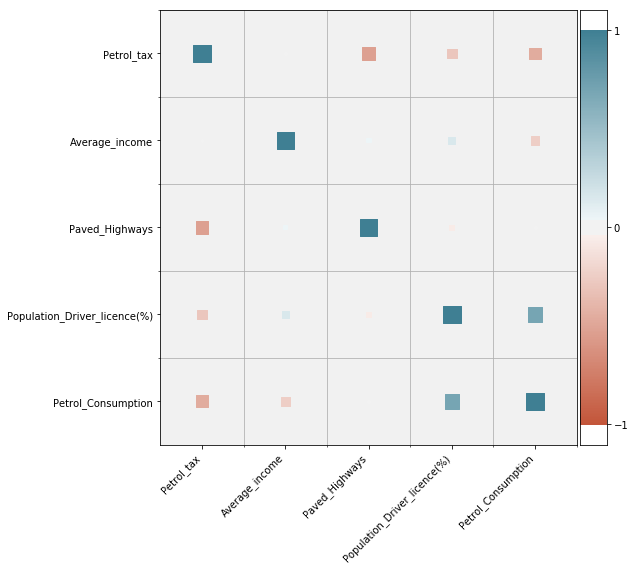

In [7]:
# Import the two methods from heatmap library
from heatmap import heatmap, corrplot

plt.figure(figsize=(8, 8))
corrplot(dataset.corr(), size_scale=300);

# Blue means positive, red means negative. The stronger the color, the larger the correlation magnitude. 



In [3]:
# load the data to input and output vairiable 

X = dataset[['Petrol_tax', 'Average_income', 'Paved_Highways','Population_Driver_licence(%)']]
y = dataset['Petrol_Consumption']

In [5]:
# Split data into train, test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


In [6]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((33, 4), (15, 4), (33,), (15,))

In [7]:
X_train


,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%)
2,9.00,3865,1586,0.580
46,7.00,4296,4083,0.623
18,7.00,4716,5915,0.724
15,7.00,4318,10340,0.586
28,8.00,4188,5975,0.563
22,9.00,4897,2449,0.511
16,7.00,4206,8508,0.572
41,7.00,3656,3985,0.563
20,7.00,4593,7834,0.663
42,7.00,4300,3635,0.603


In [9]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [10]:
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])
coeff_df


,Coefficient
Petrol_tax,-43.200216
Average_income,-0.067281
Paved_Highways,-0.005851
Population_Driver_licence(%),1331.115701


In [11]:
y_pred = regressor.predict(X_test)


In [12]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df


,Actual,Predicted
29,534,468.315946
4,410,550.397078
26,577,590.639321
30,571,572.176794
32,577,649.893941
37,704,648.443789
34,487,515.198650
40,587,674.764637
7,467,503.476378
10,580,500.073610


In [13]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 49.20375655663114
Mean Squared Error: 3673.2072706922636
Root Mean Squared Error: 60.606990279111066
